## Q1. does different musical instrument companies receive the same ratings?

In [116]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
df1=pd.read_csv("musical_instruments_cleaned.csv")
print(df1.shape)
df1.head()

In [66]:
df1.groupby(["brand"]).head()
top10brands_n_sales=df1.groupby(["brand"]).count()["title"].sort_values(ascending=False).iloc[:10,]
top10brands=list(top10brands_n_sales.index)

In [51]:
df2=df1[df1['brand'].notnull()]
df2[df2['brand'].str.contains("Addario")].groupby(['brand']).count()

,Unnamed: 0,asin,title,price,imUrl,salesRank,categories,related,description,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
brand,,,,,,,,,,,,,,,,,
D&#39;Addario,3037,3037,3037,3037,3037,3037,3037,3037,1489,3037,3027,3037,3037,3037,3037,3037,3037


'D&\#39;Addario' is the brand 'D&#39;Addario'. we did not find 'Addario'

In [69]:
df3=df2[df2['brand'].isin(top10brands)]

,Unnamed: 0,price,overall,unixReviewTime
brand,,,,
Audio-Technica,177183.702860,117.195525,4.644996,1.358881e+09
Behringer,180455.260467,75.972753,4.184404,1.347985e+09
D&#39;Addario,115251.697728,6.526424,4.538031,1.358653e+09
Fender,188879.281376,47.547166,4.360944,1.359160e+09
Jim Dunlop,100304.034016,14.162950,4.515417,1.355960e+09
On-Stage Stands,130887.491532,28.883488,4.376526,1.350297e+09
Planet Waves,184107.739665,10.171237,4.367591,1.363115e+09
PylePro,243979.655960,70.861866,3.633123,1.363984e+09
Snark,368996.055470,11.525882,4.572804,1.372470e+09


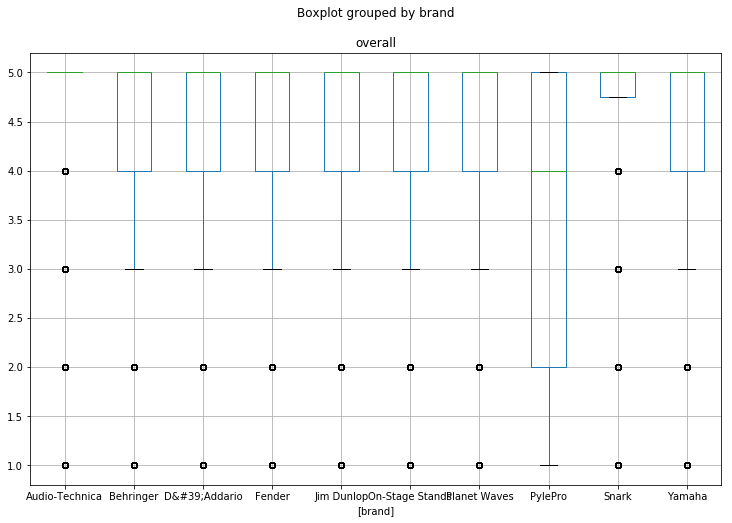

In [114]:
#plt
ax=df3[['brand','overall']].boxplot(by='brand',figsize=(12,8))
# ax.figure(figsize=(12,8))

In [106]:
brand=top10brands[0]
cmparr=[]
for brand in top10brands:
    if not brand in ['PylePro','Audio-Technica','Snark']:
        cmparr.append(list(df3[df3["brand"]==brand]['overall']))

In [113]:
f_oneway(*cmparr)

F_onewayResult(statistic=62.109158071416374, pvalue=5.6075009653532724e-77)

### Comparing between 7 companies which have similar box plots, we still think these companies receive quite different ratings.

In [124]:
mc = MultiComparison( df3['overall'].astype('float'),df3['brand'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

       Multiple Comparison of Means - Tukey HSD,FWER=0.05      
     group1          group2     meandiff  lower   upper  reject
---------------------------------------------------------------
 Audio-Technica    Behringer    -0.4606  -0.5284 -0.3928  True 
 Audio-Technica  D&#39;Addario   -0.107  -0.1884 -0.0255  True 
 Audio-Technica      Fender     -0.2841  -0.3595 -0.2086  True 
 Audio-Technica    Jim Dunlop   -0.1296  -0.2008 -0.0584  True 
 Audio-Technica On-Stage Stands -0.2685  -0.3395 -0.1974  True 
 Audio-Technica   Planet Waves  -0.2774  -0.3458  -0.209  True 
 Audio-Technica     PylePro     -1.0119  -1.0819 -0.9418  True 
 Audio-Technica      Snark      -0.0722  -0.1577  0.0133 False 
 Audio-Technica      Yamaha      -0.331  -0.4022 -0.2598  True 
   Behringer     D&#39;Addario   0.3536   0.277   0.4302  True 
   Behringer         Fender      0.1765   0.1063  0.2468  True 
   Behringer       Jim Dunlop    0.331    0.2654  0.3966  True 
   Behringer    On-Stage Stands  0.1921 

#### Tukey HSD also gives us that the ten companies receive quite different ratings.

In [135]:
df3.groupby('brand').mean().sort_values("overall")

,Unnamed: 0,price,overall,unixReviewTime
brand,,,,
PylePro,243979.655960,70.861866,3.633123,1.363984e+09
Behringer,180455.260467,75.972753,4.184404,1.347985e+09
Yamaha,205591.137910,109.222886,4.314030,1.345250e+09
Fender,188879.281376,47.547166,4.360944,1.359160e+09
Planet Waves,184107.739665,10.171237,4.367591,1.363115e+09
On-Stage Stands,130887.491532,28.883488,4.376526,1.350297e+09
Jim Dunlop,100304.034016,14.162950,4.515417,1.355960e+09
D&#39;Addario,115251.697728,6.526424,4.538031,1.358653e+09
Snark,368996.055470,11.525882,4.572804,1.372470e+09


Audio-Technica, Snark and D&#39;Addario recive the highest ratings 

---------------

In [133]:
df2=df1[df1['brand'].notnull()]
df2[df2['title'].str.contains("piano")]#.sort_values(['brand'])
df2[df2['title'].str.contains("violin")]
#df2[df2['title'].str.contains("piano")].groupby(['brand']).count()

,Unnamed: 0,asin,title,price,imUrl,salesRank,categories,related,brand,description,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
49466,98011,B0006ZXF74,D'Addario J56 4/4M Pro-Arte Nylon violin Strin...,23.90,http://ecx.images-amazon.com/images/I/61xH82tW...,{'Musical Instruments': 3430},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B000F3JO7M', 'B0002II6V0', '...",D&#39;Addario,Sized to fit 4/4 scale violin with a playing l...,A1PFZWJCB5QA6T,NaN,"[0, 0]",These strings sound about the same as the prel...,3.0,Three Stars,1405468800,"07 16, 2014"
49467,98012,B0006ZXF74,D'Addario J56 4/4M Pro-Arte Nylon violin Strin...,23.90,http://ecx.images-amazon.com/images/I/61xH82tW...,{'Musical Instruments': 3430},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B000F3JO7M', 'B0002II6V0', '...",D&#39;Addario,Sized to fit 4/4 scale violin with a playing l...,A907V5E0QCBB1,andrew,"[0, 1]",I'm not an expert but i like these strings muc...,5.0,So far so good,1394582400,"03 12, 2014"
49468,98013,B0006ZXF74,D'Addario J56 4/4M Pro-Arte Nylon violin Strin...,23.90,http://ecx.images-amazon.com/images/I/61xH82tW...,{'Musical Instruments': 3430},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B000F3JO7M', 'B0002II6V0', '...",D&#39;Addario,Sized to fit 4/4 scale violin with a playing l...,AW3DGLQJXXTF9,Banjo Hero,"[0, 1]",I play an older German long Strad copy and the...,5.0,Great for fiddling!,1390348800,"01 22, 2014"
49469,98014,B0006ZXF74,D'Addario J56 4/4M Pro-Arte Nylon violin Strin...,23.90,http://ecx.images-amazon.com/images/I/61xH82tW...,{'Musical Instruments': 3430},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B000F3JO7M', 'B0002II6V0', '...",D&#39;Addario,Sized to fit 4/4 scale violin with a playing l...,A1G9HOMZ2LKDVO,Beautiful Dreamer,"[16, 17]","When I got my used violin, the luthier who set...",5.0,"Nice sound, long-lasting, inexpensive.",1294444800,"01 8, 2011"
49470,98015,B0006ZXF74,D'Addario J56 4/4M Pro-Arte Nylon violin Strin...,23.90,http://ecx.images-amazon.com/images/I/61xH82tW...,{'Musical Instruments': 3430},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B000F3JO7M', 'B0002II6V0', '...",D&#39;Addario,Sized to fit 4/4 scale violin with a playing l...,AFDM268ILY759,B. Maloney,"[0, 0]",I tried these strings on a friends advice. The...,3.0,"Not bad, but not my cup of tea",1314144000,"08 24, 2011"
49471,98016,B0006ZXF74,D'Addario J56 4/4M Pro-Arte Nylon violin Strin...,23.90,http://ecx.images-amazon.com/images/I/61xH82tW...,{'Musical Instruments': 3430},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B000F3JO7M', 'B0002II6V0', '...",D&#39;Addario,Sized to fit 4/4 scale violin with a playing l...,A2PYEOWMJZXFB8,Carla J. Schroder,"[16, 16]","I have an low-budget student violin, and start...",5.0,Pleasing sound on low-budget violin,1272326400,"04 27, 2010"
49472,98017,B0006ZXF74,D'Addario J56 4/4M Pro-Arte Nylon violin Strin...,23.90,http://ecx.images-amazon.com/images/I/61xH82tW...,{'Musical Instruments': 3430},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B000F3JO7M', 'B0002II6V0', '...",D&#39;Addario,Sized to fit 4/4 scale violin with a playing l...,A3QQWKED6PBYBF,c,"[0, 0]",for the price they have a great sound. Rich a...,4.0,love these strings,1378425600,"09 6, 2013"
49473,98018,B0006ZXF74,D'Addario J56 4/4M Pro-Arte Nylon violin Strin...,23.90,http://ecx.images-amazon.com/images/I/61xH82tW...,{'Musical Instruments': 3430},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B000F3JO7M', 'B0002II6V0', '...",D&#39;Addario,Sized to fit 4/4 scale violin with a playing l...,A2LGVFU9M3GPT,ChrisK,"[2, 2]",I love these strings. One reviewer said that t...,5.0,I Love these strings,1331942400,"03 17, 2012"
49474,98019,B0006ZXF74,D'Addario J56 4/4M Pro-Arte Nylon violin Strin...,23.90,http://ecx.images-amazon.com/images/I/